In [9]:
import numpy as np
import matplotlib.pyplot as plt

from izhikevich_rnn import Izhikevich

In [10]:
network = Izhikevich(N=2000, T=2000, I_BIAS=1000, dt=4e-2, p=.1)
voltage_trace = network.render()

100%|██████████| 50000/50000 [00:09<00:00, 5294.29it/s]


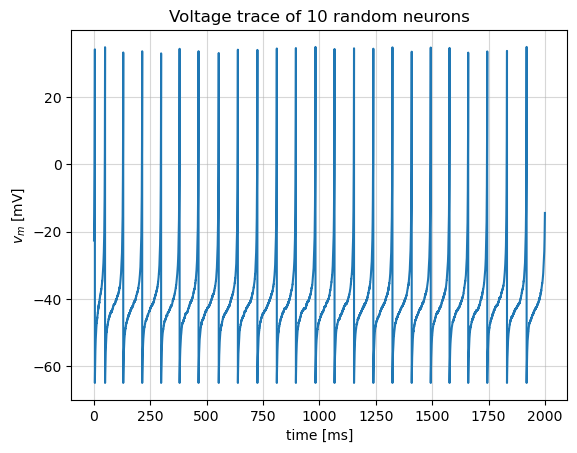

In [11]:
plt.plot(network.time, voltage_trace)
plt.grid(alpha=.5)
plt.xlabel("time [ms]")
plt.ylabel(r"$v_m$ [mV]")
plt.title("Voltage trace of 10 random neurons")
plt.savefig(f"img/iz_voltage_trace_{network._N}_{network._T}.jpg", bbox_inches="tight")
plt.show()

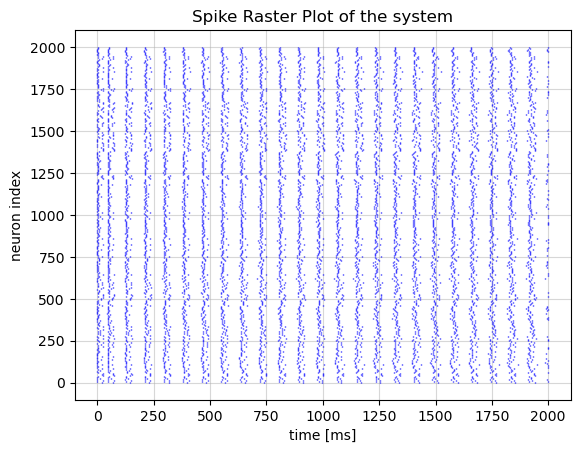

In [12]:
plt.eventplot(network.tspike, linewidths=1, linelengths=1, colors='b')
plt.xlabel("time [ms]")
plt.ylabel("neuron index")
plt.title("Spike Raster Plot of the system")
plt.grid(alpha=.5)
plt.savefig(f"img/iz_rasterplot_{network._N}_{network._T}.jpg", bbox_inches="tight")
plt.show()